# GL / GM work

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
from dask.diagnostics import ProgressBar
import warnings
warnings.filterwarnings("ignore")

## Prepare the data

In [2]:
from yamlparser import YAMLParser, read_parameterized_runs

In [3]:
yp = YAMLParser()

In [5]:
# read parameterized runs
exps_param = yp.read('/glade/u/home/noraloose/GL90_paper/config_param.yaml')
%time exps_param = read_parameterized_runs(exps_param)

nw2_0.5deg_N15_KHTH800
nw2_0.5deg_N15_KHGL800_hbbl5
nw2_0.5deg_N15_KHTH800_vary
nw2_0.5deg_N15_KHGL800_vary_hbbl5
nw2_0.5deg_N15_EBT_KHTH800
nw2_0.5deg_N15_EBT_KHGL800_hbbl5
nw2_0.25deg_N15_KHTH300
nw2_0.25deg_N15_KHGL300_hbbl1
nw2_0.25deg_N15_KHGL300_hbbl5
nw2_0.25deg_N15_KHGL300_hbbl20
nw2_0.25deg_N15_KHGL300
nw2_0.25deg_N15_KHTH800
nw2_0.25deg_N15_KHGL800_hbbl5
nw2_0.25deg_N15_KHTH300_vary
nw2_0.25deg_N15_KHGL300_vary_hbbl5
nw2_0.25deg_N15_EBT_KHTH300
nw2_0.25deg_N15_EBT_KHGL300_hbbl5
nw2_0.125deg_N15_KHTH100
nw2_0.125deg_N15_KHGL100_hbbl5
nw2_0.125deg_N15_KHTH800
nw2_0.125deg_N15_KHGL800_hbbl5
nw2_0.125deg_N15_KHTH100_vary
nw2_0.125deg_N15_KHGL100_vary_hbbl5
nw2_0.125deg_N15_EBT_KHTH100
nw2_0.125deg_N15_EBT_KHGL100_hbbl5
CPU times: user 11.9 s, sys: 1.76 s, total: 13.6 s
Wall time: 1min 41s


## Average data over last 2000 days

In [6]:
for exp, v in exps_param.items():
        ds = v['ds']
        dst = ds.mean(dim='time', keep_attrs=True)
        v['dst'] = dst

## GM vs GL work

In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'large',
         'axes.labelsize': 'large',
         'axes.titlesize':'large',
         'xtick.labelsize':'large',
         'ytick.labelsize':'large',
         'font.size': 12}
pylab.rcParams.update(params)

In [8]:
import cartopy.crs as ccrs

In [9]:
import matplotlib as mpl
cmap = mpl.cm.GnBu_r
cmap.set_over('r')
cmap.set_bad('gray')

In [10]:
def GLGMwork_plot(dst_GL, dst_GM, st, label_GL, label_GM, vmax, ticks, yticklabels, show_pos=False):

    extent = [0, 60, -70, 70]

    fig, axs = plt.subplots(1, 2, figsize=(6, 6), subplot_kw={'projection':ccrs.PlateCarree()})

    fld = 'GMwork'
    # convert from W m-2 to m3s-3
    p = ((dst_GM[fld] / 1000).where(st.wet)).plot(
                ax=axs[0], 
                vmax=0, vmin=-vmax, cmap=cmap,
                transform=ccrs.PlateCarree(), 
                add_colorbar = False
    )
    axs[0].set_title('GM work')
    axs[0].text(30, 82, label_GM, ha='center', size=14)

    fld = 'KE_visc_gl90'
    p = (dst_GL[fld].sum(dim='zl').where(st.wet)).plot(
                ax=axs[1], 
                vmax=0, vmin=-vmax, cmap=cmap,
                add_colorbar=False,
                transform=ccrs.PlateCarree()
    )
    axs[1].set_title('GL work')
    axs[1].text(30, 82, label_GL, ha='center', size=14)
    

    for ax in axs:
        ax.set_extent(extent, crs=ccrs.PlateCarree())
        gl = ax.gridlines(draw_labels=True)
        gl.top_labels = False
        gl.right_labels = False
        gl.xlabel_style = {'size': 14}
        gl.ylabel_style = {'size': 14}
        if ax == axs[1]:
            gl.left_labels = False

    # colorbar
    fig.subplots_adjust(left=0.1, bottom=0.1)
    cax = fig.add_axes([0.1, -0.01, 0.8, 0.05])
    if show_pos:
        cb = fig.colorbar(p, cax=cax, extend='both', orientation='horizontal', ticks=ticks)
    else:
        cb = fig.colorbar(p, cax=cax, extend='min', orientation='horizontal', ticks=ticks)

    cb.ax.tick_params(labelsize=14)
    cb.set_label(label=r'$\times 10^{-5}$ [m$^3$ s$^{-3}$]',size=14)
    cb.ax.set_xticklabels(yticklabels)

    return fig


### 1/2 degree

In [11]:
exp_str_GM = 'nw2_0.5deg_N15_KHTH800'
exp_str_GL = 'nw2_0.5deg_N15_KHGL800_hbbl5'
label_GL = '(b) 1/2$^\circ$ GL 800'
label_GM = '(a) 1/2$^\circ$ GM 800'
vmax = 0.000075
ticks = 1e-5*np.arange(-6,7,3)
yticklabels = ['-6','-3','0','3','6']

dst_GM = exps_param[exp_str_GM]['dst']
dst_GL = exps_param[exp_str_GL]['dst']
st = exps_param[exp_str_GL]['st']
ds_GM = exps_param[exp_str_GM]['ds']
ds_GL = exps_param[exp_str_GL]['ds']

print(ds_GM.time[0].values)
print(len(ds_GM.time))
print(ds_GL.time[0].values)
print(len(ds_GL.time))

75002.5
400
75002.5
400


In [12]:
with ProgressBar():
    dst_GM.GMwork.load()
    dst_GL.KE_visc_gl90.load()

[########################################] | 100% Completed | 12.0s
[########################################] | 100% Completed | 19.9s


First, let's see if the GM work and GL work are really sign-definite.

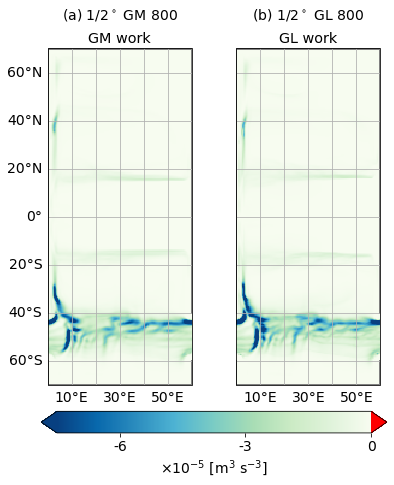

In [13]:
fig = GLGMwork_plot(dst_GL, dst_GM, st, label_GL, label_GM, vmax, ticks, yticklabels, show_pos=True)

No positive values (red shading) occur, so GL work and GM work are indeed sign-definite. (We have also checked that this is true on shorter time scales, including on a time-step basis). In the following, we will just cut off the colorbar at 0.

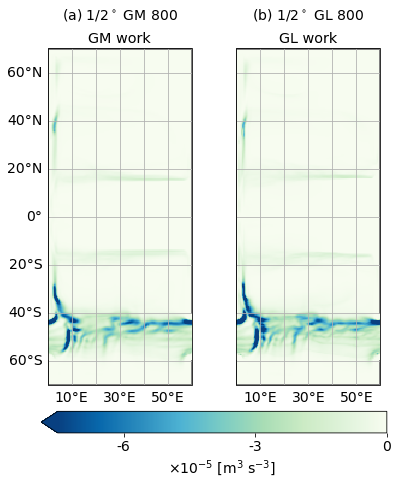

In [15]:
fig = GLGMwork_plot(dst_GL, dst_GM, st, label_GL, label_GM, vmax, ticks, yticklabels, show_pos=False)

figname = '/glade/u/home/noraloose/GL90_paper/figures/GLGMwork_0.5deg.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

### 1/4 degree

In [17]:
exp_str_GM = 'nw2_0.25deg_N15_KHTH300'
exp_str_GL = 'nw2_0.25deg_N15_KHGL300_hbbl5'
label_GL = '(d) 1/4$^\circ$ GL 300'
label_GM = '(c) 1/4$^\circ$ GM 300'
vmax = 0.00005
ticks = 1e-5*np.arange(-4,5,2)
yticklabels = ['-4','-2','0','2','4']

dst_GM = exps_param[exp_str_GM]['dst']
dst_GL = exps_param[exp_str_GL]['dst']
st = exps_param[exp_str_GL]['st']
ds_GM = exps_param[exp_str_GM]['ds']
ds_GL = exps_param[exp_str_GL]['ds']

print(ds_GM.time[0].values)
print(len(ds_GM.time))
print(ds_GL.time[0].values)
print(len(ds_GL.time))

75002.5
400
75002.5
400


In [18]:
with ProgressBar():
    dst_GM.GMwork.load()
    dst_GL.KE_visc_gl90.load()

[########################################] | 100% Completed | 13.1s
[########################################] | 100% Completed | 46.5s


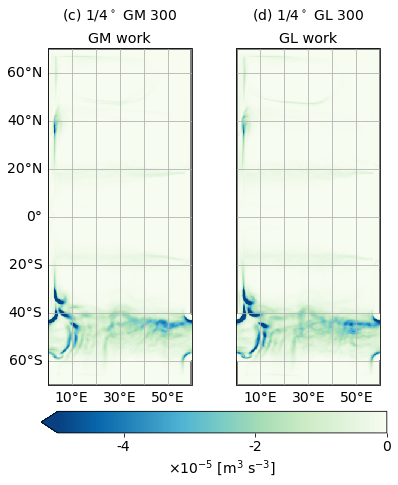

In [19]:
fig = GLGMwork_plot(dst_GL, dst_GM, st, label_GL, label_GM, vmax, ticks, yticklabels, show_pos=False)

figname = '/glade/u/home/noraloose/GL90_paper/figures/GLGMwork_0.25deg.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

In [32]:
exp_str_GM = 'nw2_0.25deg_N15_KHTH800'
exp_str_GL = 'nw2_0.25deg_N15_KHGL800_hbbl5'
label_GL = '1/4$^\circ$ GL 800'
label_GM = '1/4$^\circ$ GM 800'
vmax = 0.00005
ticks = 1e-5*np.arange(-4,5,2)
yticklabels = ['-4','-2','0','2','4']

dst_GM = exps_param[exp_str_GM]['dst']
dst_GL = exps_param[exp_str_GL]['dst']
st = exps_param[exp_str_GL]['st']
ds_GM = exps_param[exp_str_GM]['ds']
ds_GL = exps_param[exp_str_GL]['ds']

print(ds_GM.time[0].values)
print(len(ds_GM.time))
print(ds_GL.time[0].values)
print(len(ds_GL.time))

75002.5
400
75002.5
400


In [21]:
with ProgressBar():
    dst_GM.GMwork.load()
    dst_GL.KE_visc_gl90.load()

[########################################] | 100% Completed | 13.2s
[########################################] | 100% Completed | 42.1s


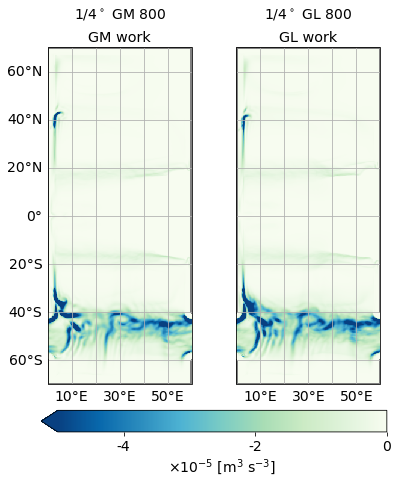

In [33]:
fig = GLGMwork_plot(dst_GL, dst_GM, st, label_GL, label_GM, vmax, ticks, yticklabels, show_pos=False)

figname = '/glade/u/home/noraloose/GL90_paper/figures/GLGMwork800_0.25deg.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

### 1/8 degree

In [23]:
exp_str_GM = 'nw2_0.125deg_N15_KHTH100'
exp_str_GL = 'nw2_0.125deg_N15_KHGL100_hbbl5'
label_GL = '(f) 1/8$^\circ$ GL 100'
label_GM = '(e) 1/8$^\circ$ GM 100'
vmax = 0.000025
ticks = 1e-5*np.arange(-2,3,1)
yticklabels = ['-2','-1','0','1','2']

dst_GM = exps_param[exp_str_GM]['dst']
dst_GL = exps_param[exp_str_GL]['dst']
st = exps_param[exp_str_GL]['st']
ds_GM = exps_param[exp_str_GM]['ds']
ds_GL = exps_param[exp_str_GL]['ds']

print(ds_GM.time[0].values)
print(len(ds_GM.time))
print(ds_GL.time[0].values)
print(len(ds_GL.time))

26002.5
400
26002.5
400


In [24]:
with ProgressBar():
    dst_GM.GMwork.load()
    dst_GL.KE_visc_gl90.load()

[########################################] | 100% Completed | 21.1s
[########################################] | 100% Completed |  3min 16.8s


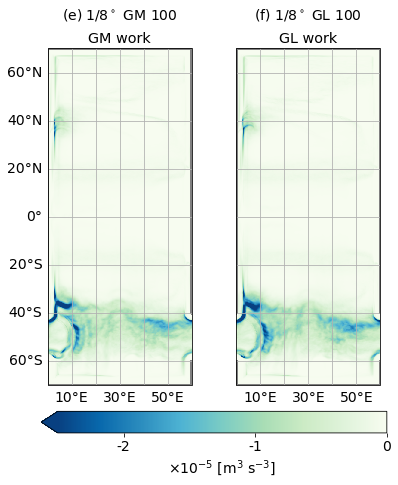

In [25]:
fig = GLGMwork_plot(dst_GL, dst_GM, st, label_GL, label_GM, vmax, ticks, yticklabels, show_pos=False)

figname = '/glade/u/home/noraloose/GL90_paper/figures/GLGMwork_0.125deg.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)

In [29]:
exp_str_GM = 'nw2_0.125deg_N15_KHTH800'
exp_str_GL = 'nw2_0.125deg_N15_KHGL800_hbbl5'
label_GL = '1/8$^\circ$ GL 800'
label_GM = '1/8$^\circ$ GM 800'
vmax = 0.000025
ticks = 1e-5*np.arange(-2,3,1)
yticklabels = ['-2','-1','0','1','2']

dst_GM = exps_param[exp_str_GM]['dst']
dst_GL = exps_param[exp_str_GL]['dst']
st = exps_param[exp_str_GL]['st']
ds_GM = exps_param[exp_str_GM]['ds']
ds_GL = exps_param[exp_str_GL]['ds']

print(ds_GM.time[0].values)
print(len(ds_GM.time))
print(ds_GL.time[0].values)
print(len(ds_GL.time))

26002.5
400
26002.5
400


In [30]:
with ProgressBar():
    dst_GM.GMwork.load()
    dst_GL.KE_visc_gl90.load()

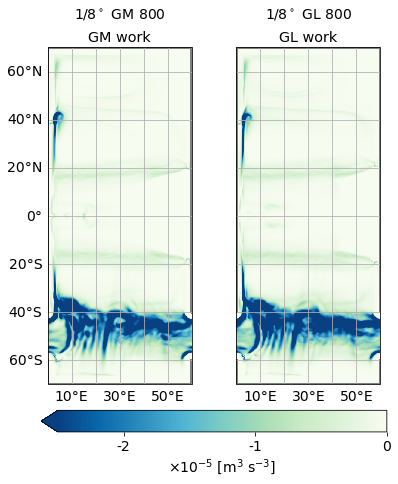

In [31]:
fig = GLGMwork_plot(dst_GL, dst_GM, st, label_GL, label_GM, vmax, ticks, yticklabels, show_pos=False)

figname = '/glade/u/home/noraloose/GL90_paper/figures/GLGMwork800_0.125deg.png'
plt.savefig(figname, dpi=200, bbox_inches='tight', pad_inches=0)